In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
import pandas as pd

data = {
    'BPM': [100, 120, 130, 110, 140],
    'Energy': [60, 80, 75, 70, 90],
    'Danceability': [70, 85, 80, 60, 95],
    'Loudness': [-5, -4, -3, -6, -2],
    'Liveness': [10, 20, 15, 5, 12],
    'Valence': [50, 60, 55, 40, 70],
    'Length': [200, 210, 190, 230, 220],
    'Acousticness': [30, 20, 25, 35, 10],
    'Speechiness': [5, 7, 6, 4, 8],
    'Popularity': [85, 90, 78, 70, 95],
    'Genre': ['Pop', 'Hip-Hop', 'Electronic', 'Pop', 'Hip-Hop']
}

df = pd.DataFrame(data)
df.head()


,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre
0,100,60,70,-5,10,50,200,30,5,85,Pop
1,120,80,85,-4,20,60,210,20,7,90,Hip-Hop
2,130,75,80,-3,15,55,190,25,6,78,Electronic
3,110,70,60,-6,5,40,230,35,4,70,Pop
4,140,90,95,-2,12,70,220,10,8,95,Hip-Hop


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
genre_labels = le.classes_
print("Genre classes:", genre_labels)


Genre classes: ['Electronic' 'Hip-Hop' 'Pop']


In [5]:
X = df.drop('Genre', axis=1)
y = df['Genre']


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42  # 60/40 split due to small size
)


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Labels in this test set: [0 1]
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00       0.0
     Hip-Hop       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

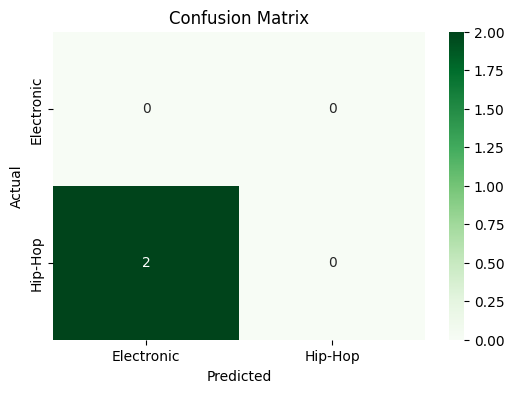

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

# Make predictions
y_pred = model.predict(X_test)

# Get only the labels that exist in the current test set
labels_in_data = unique_labels(y_test, y_pred)
print("Labels in this test set:", labels_in_data)

# Show accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report (with safe label mapping)
print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
    labels=labels_in_data,
    target_names=le.inverse_transform(labels_in_data)
))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=le.inverse_transform(labels_in_data),
            yticklabels=le.inverse_transform(labels_in_data))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
